In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Definição da amostra

In [2]:
popu = pd.read_csv("Popu_series.csv")
popu = popu.sample(frac=0.3, replace=False, random_state=195)
len(popu)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 2191: invalid continuation byte

In [25]:
popu = popu['serie']
popu

146                            The Chosen One
95                                    Osmosis
173                                  Puerta 7
106                           Holiday Secrets
204                                Mindhunter
                        ...                  
28                              Sex Education
230                          The English Game
85                            Paava Kadhaigal
233                                  Homemade
264    Trailer Park Boys Out of the Park: USA
Name: serie, Length: 97, dtype: object

In [27]:
popu.to_csv("Amostra.csv", index=False)

# Análise Exploratória

In [3]:
#imdb = pd.read_csv("imdb_series.csv") REMOVER (arquivo da amostra antiga)
imdb = pd.read_csv("Amostra_IMDB.csv")
twitter = pd.read_csv("series_dataset_count/dataset_count.csv")
reviews = pd.read_csv("UserReviewsCritic.csv", sep=";")

In [4]:
reviews.head()

,titulo,user_reviews,critic_reviews
0,The Chosen One,27,5
1,Osmosis,50,10
2,Puerta 7,14,4
3,Holiday Secrets,7,5
4,Mindhunter,867,115


In [5]:
twitter.dropna(inplace=True)

In [6]:
twitter

,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,IMDBid
0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,9048368
1,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,7043380
2,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,9170386
3,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,11243536
4,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,5290382
...,...,...,...,...,...,...,...
92,Sex Education,2019-01-11,2204.0,13414.0,44564.0,60182.0,7767422
93,The English Game,2020-03-20,0.0,1.0,5.0,6.0,8403664
94,Paava Kadhaigal,2020-12-18,366.0,577.0,325.0,1268.0,13206988
95,Homemade,2020-06-30,142.0,180.0,232.0,554.0,12574336


In [7]:
imdb.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,Data de estréia,Roteiristas,Censura,País,Idiomas,Episodios
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,2019-06-28,"Pablo Cruz, Raphael Draccon, Raphael Draccon","Argentina:16, Brazil:16, Germany:16::(self-app...",Brazil,Portuguese,6.0
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,2019-03-29,"Gabriel Chiche, Louis Chiche, William Chiche","Brazil:16::(self-applied), France:13::(self-ap...",France,French,8.0
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,2020-02-21,"Patricio Vega, Martin Zimmerman, Martin Zimmerman","Argentina:18, Australia:M, Philippines:18+::(s...",Argentina,Spanish,8.0
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,2019-11-20,Katharina Eyssen,"Argentina:13, Singapore:PG13",Germany,German,3.0
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,2017-10-13,"John Douglas, Mark Olshaker, Joe Penhall","Argentina:16, Australia:MA15+::(Netflix self-r...",United States,English,10.0


In [8]:
reviews.rename(columns={"titulo":"Titulo"}, inplace=True)
aux = pd.merge(imdb, twitter, on = "IMDBid")
dados = pd.merge(aux, reviews, on = "Titulo")

#dados.drop(dados[dados["Nome"]=="LoveDeathandRobots"].index, inplace=True)
dados.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,...,Portuguese,6.0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,27,5
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,...,French,8.0,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,50,10
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,...,Spanish,8.0,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,14,4
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,...,German,3.0,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,7,5
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,...,English,10.0,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,867,115


# Análise Exploratória

## Nota

<AxesSubplot:xlabel='Nota', ylabel='Count'>

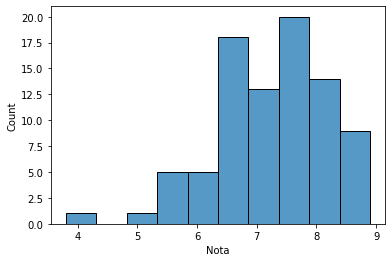

In [61]:
sns.histplot(data=dados, x="Nota")

<AxesSubplot:ylabel='Nota'>

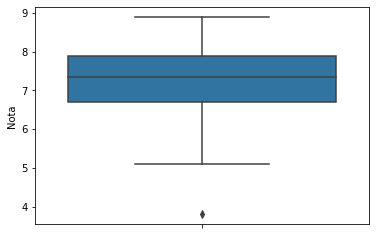

In [25]:
sns.boxplot(y=dados['Nota'], data=dados)

<AxesSubplot:xlabel='Ano', ylabel='Nota'>

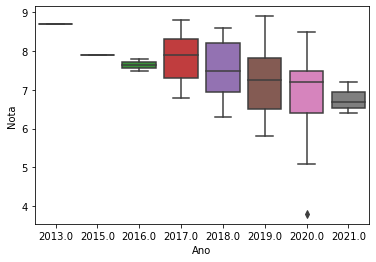

In [26]:
sns.boxplot(x=dados['Ano'],y=dados['Nota'], data=dados)

In [27]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
dados['Gênero']


C:\Users\Amamiya\AppData\Local\Temp/ipykernel_13220/1689104892.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)


,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

C:\Users\Amamiya\AppData\Local\Temp/ipykernel_13220/1547980755.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)


In [35]:
len(dados)

86

In [33]:
dados = dados.join(dummies)

In [34]:
dados.head(5)

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,Western
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","[Mystery, Thriller]",40.0,25.0,2019.0,...,0,0,0,1,0,0,0,0,1,0
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","[Romance, Sci-Fi]",55.0,24.0,2019.0,...,0,0,0,0,1,1,0,0,0,0
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","[Crime, Drama, Thriller]",45.0,14.0,2020.0,...,0,0,0,0,0,0,0,0,1,0
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",[Drama],NaN,7.0,2019.0,...,0,0,0,0,0,0,0,0,0,0
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","[Crime, Drama, Thriller]",60.0,25.0,2017.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#dados[colunas = 25:45].equals(dummies)

In [41]:
dados['Gênero'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Comedy]                                                10
[Comedy, Drama]                                          6
[Drama]                                                  6
[Crime, Drama, Thriller]                                 5
[Comedy, Drama, Romance]                                 5
[Drama, Thriller]                                        3
[Crime, Drama, Mystery, Thriller]                        3
[Comedy, Drama, Fantasy]                                 2
[Drama, Mystery, Thriller]                               2
[Crime, Drama]                                           2
[Comedy, Crime, Drama]                                   2
[Biography, Crime, Drama, History]                       1
[Biography, Drama, Music]                                1
[Action, Crime, Drama, Thriller]                         1
[Crime, Drama, Mystery, Sci-Fi, Thriller]                1
[Drama, Horror, Mystery, Romance, Sci-Fi, Thriller]      1
[Action, Drama, Western]                                

In [46]:
dados.columns

Index(['Titulo', 'Check', 'IMDBid', 'Nota', 'Votos', 'Elenco', 'Gênero',
       'Duração', 'Reviews', 'Ano', 'Data de estréia', 'Roteiristas',
       'Censura', 'País', 'Idiomas', 'Episodios', 'Nome', 'DataEstreia',
       'CountPre', 'CountDurante', 'CountPos', 'CountTotal', 'user_reviews',
       'critic_reviews', 'Action', 'Adventure', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller',
       'Western'],
      dtype='object')

In [47]:
dados.columns[24]

'Action'

### Nota do IMDB e número de votos por engajamento por engajamento

<AxesSubplot:xlabel='Nota', ylabel='CountTotal'>

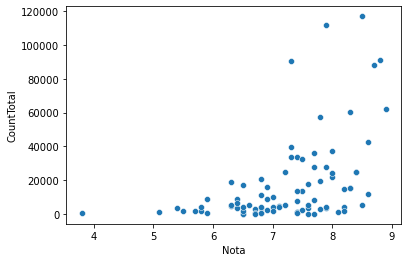

In [9]:
#dados['Nota'] CountPre CountDurante CountPos CountTotal

sns.scatterplot(data=dado, x="Nota", y="CountTotal")

<AxesSubplot:xlabel='Nota', ylabel='CountTotal'>

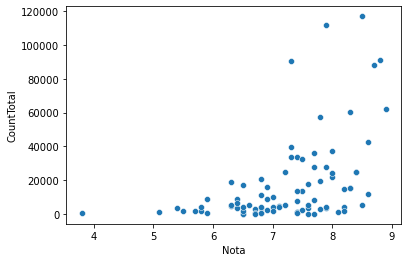

In [54]:
sns.scatterplot(data=dados, x="Nota", y="CountTotal")#, hue=dados['País'])

<AxesSubplot:xlabel='Nota', ylabel='País'>

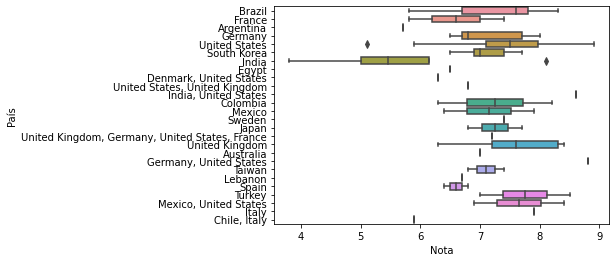

In [57]:
sns.boxplot(data=dados, x="Nota", y="País")#, hue=dados['País'])

<AxesSubplot:xlabel='Episodios', ylabel='Nota'>

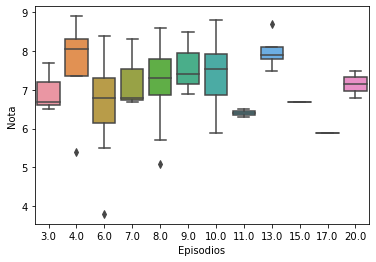

In [58]:
sns.boxplot(data=dados, x="Episodios", y="Nota")

<AxesSubplot:xlabel='Check', ylabel='Nota'>

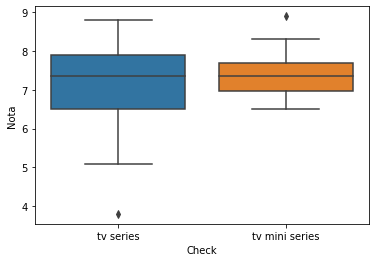

In [59]:
sns.boxplot(data=dados, x="Check", y="Nota")

<AxesSubplot:xlabel='Nota', ylabel='CountPre'>

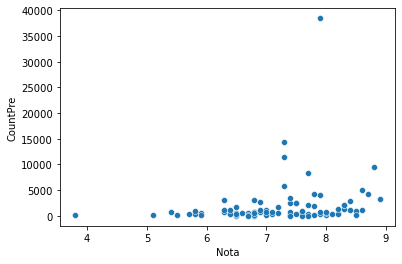

In [11]:
sns.scatterplot(data=dados, x="Nota", y="CountPre")

<AxesSubplot:xlabel='Nota', ylabel='CountDurante'>

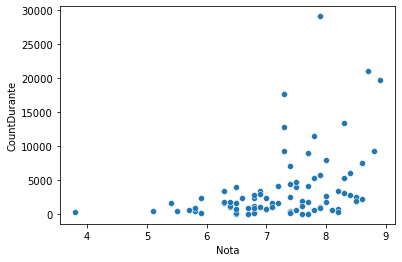

In [12]:
sns.scatterplot(data=dados, x="Nota", y="CountDurante")

<AxesSubplot:xlabel='Nota', ylabel='CountPos'>

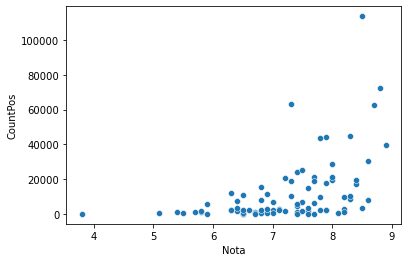

In [13]:
sns.scatterplot(data=dados, x="Nota", y="CountPos")

In [14]:
dados.corr(method='pearson')
#dados.corr(method='spearman')

,IMDBid,Nota,Votos,Duração,Reviews,Ano,Episodios,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
IMDBid,1.000000,-0.438873,-0.543804,-0.050112,-0.203304,0.852411,-0.384553,-0.479329,-0.596080,-0.364468,-0.482506,-0.301997,-0.529820
Nota,-0.438873,1.000000,0.481724,0.159862,0.241047,-0.410434,0.070388,0.206121,0.405380,0.476275,0.476569,0.351861,0.428520
Votos,-0.543804,0.481724,1.000000,0.100280,0.175834,-0.559226,0.147458,0.467113,0.740705,0.636127,0.712633,0.671408,0.906763
Duração,-0.050112,0.159862,0.100280,1.000000,0.073352,0.066071,-0.110071,0.070078,0.143625,0.068403,0.092940,0.276086,0.191175
Reviews,-0.203304,0.241047,0.175834,0.073352,1.000000,-0.100923,0.156937,0.131058,0.218206,0.210372,0.225888,0.224466,0.246005
Ano,0.852411,-0.410434,-0.559226,0.066071,-0.100923,1.000000,-0.417665,-0.408439,-0.507547,-0.304749,-0.406723,-0.218032,-0.466299
Episodios,-0.384553,0.070388,0.147458,-0.110071,0.156937,-0.417665,1.000000,0.191909,0.160133,0.119649,0.157592,0.048742,0.119927
CountPre,-0.479329,0.206121,0.467113,0.070078,0.131058,-0.408439,0.191909,1.000000,0.774767,0.423803,0.659854,0.358995,0.631771
CountDurante,-0.596080,0.405380,0.740705,0.143625,0.218206,-0.507547,0.160133,0.774767,1.000000,0.624508,0.813774,0.479688,0.766159
CountPos,-0.364468,0.476275,0.636127,0.068403,0.210372,-0.304749,0.119649,0.423803,0.624508,1.000000,0.952900,0.573044,0.608712


In [15]:
dados.corr(method='spearman')

,IMDBid,Nota,Votos,Duração,Reviews,Ano,Episodios,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
IMDBid,1.000000,-0.406394,-0.521166,-0.117717,-0.227987,0.827372,-0.367692,-0.691602,-0.587313,-0.552356,-0.578967,-0.420673,-0.450195
Nota,-0.406394,1.000000,0.601788,0.134185,0.316387,-0.417161,0.113778,0.356452,0.459697,0.545541,0.512273,0.414229,0.432309
Votos,-0.521166,0.601788,1.000000,0.317217,0.567617,-0.343849,0.163860,0.692847,0.804532,0.816237,0.817801,0.881963,0.833268
Duração,-0.117717,0.134185,0.317217,1.000000,0.115969,-0.029714,-0.026586,0.328791,0.269810,0.265277,0.291063,0.290488,0.374427
Reviews,-0.227987,0.316387,0.567617,0.115969,1.000000,-0.118405,0.267075,0.353750,0.453055,0.460906,0.450246,0.533508,0.474128
Ano,0.827372,-0.417161,-0.343849,-0.029714,-0.118405,1.000000,-0.343698,-0.480547,-0.353203,-0.349872,-0.353556,-0.215682,-0.204901
Episodios,-0.367692,0.113778,0.163860,-0.026586,0.267075,-0.343698,1.000000,0.317934,0.353833,0.365534,0.362114,0.186603,0.126091
CountPre,-0.691602,0.356452,0.692847,0.328791,0.353750,-0.480547,0.317934,1.000000,0.873182,0.778786,0.842542,0.695150,0.703319
CountDurante,-0.587313,0.459697,0.804532,0.269810,0.453055,-0.353203,0.353833,0.873182,1.000000,0.916529,0.956945,0.798451,0.754600
CountPos,-0.552356,0.545541,0.816237,0.265277,0.460906,-0.349872,0.365534,0.778786,0.916529,1.000000,0.984754,0.786550,0.751146


<AxesSubplot:xlabel='Ano', ylabel='CountTotal'>

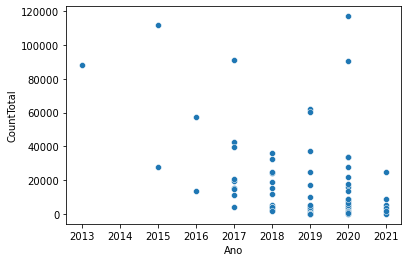

In [16]:
sns.scatterplot(data=dados, x="Ano", y="CountTotal")

<AxesSubplot:xlabel='Ano', ylabel='Votos'>

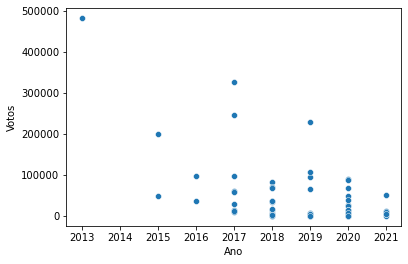

In [17]:
sns.scatterplot(data=dados, x="Ano", y="Votos")

In [18]:
dados[dados['Ano']==2013]

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
71,House of Cards,tv series,1856010,8.7,482800.0,"Robin Wright, Michael Kelly, Kevin Spacey, Jus...",Drama,51.0,25.0,2013.0,...,English,13.0,House of Cards,2013-02-01,4193.0,21081.0,62727.0,88001.0,893,169


<AxesSubplot:xlabel='Votos', ylabel='CountTotal'>

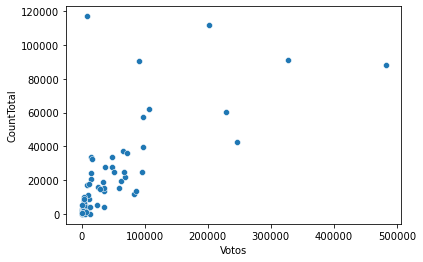

In [19]:
sns.scatterplot(data=dados, x="Votos", y="CountTotal")

<AxesSubplot:xlabel='Nota', ylabel='Votos'>

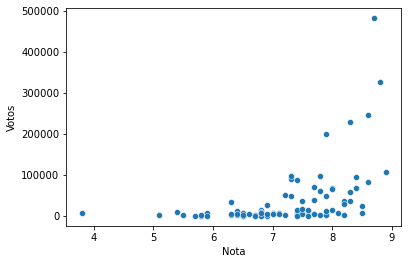

In [20]:
sns.scatterplot(data=dados, x="Nota", y="Votos")

## Votos

<AxesSubplot:xlabel='Votos', ylabel='Count'>

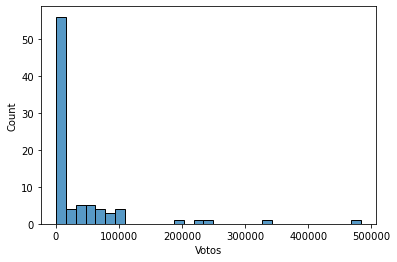

In [76]:
# 120000 - 20000 - 2500
sns.histplot(data=dados[dados["Votos"] > 0], x="Votos")#, log_scale=True)

<AxesSubplot:ylabel='Votos'>

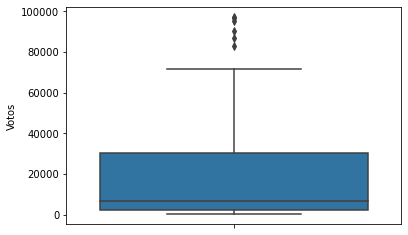

In [82]:
sns.boxplot(data=dados[dados["Votos"] < 100000], y='Votos')

<AxesSubplot:xlabel='Nota', ylabel='Votos'>

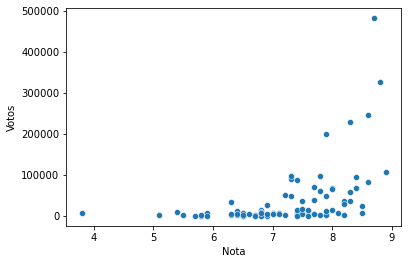

In [85]:
sns.scatterplot(data=dados, x="Nota", y="Votos")

<AxesSubplot:xlabel='Ano', ylabel='Votos'>

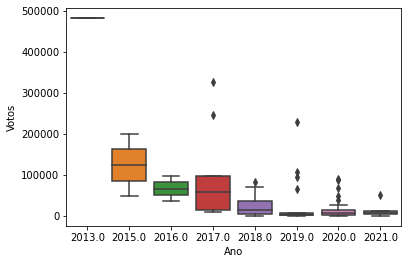

In [87]:
sns.boxplot(data=dados, x="Ano", y="Votos")

<AxesSubplot:xlabel='Votos', ylabel='País'>

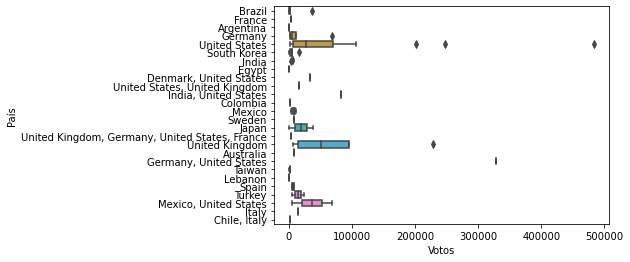

In [90]:
sns.boxplot(data=dados, x="Votos", y="País")

<AxesSubplot:xlabel='Episodios', ylabel='Votos'>

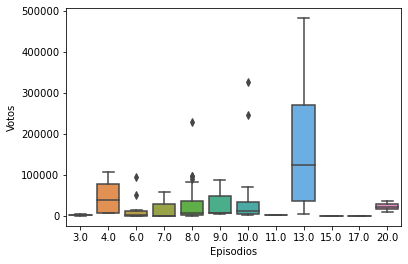

In [91]:
sns.boxplot(data=dados, x="Episodios", y="Votos")

<AxesSubplot:xlabel='user_reviews', ylabel='Votos'>

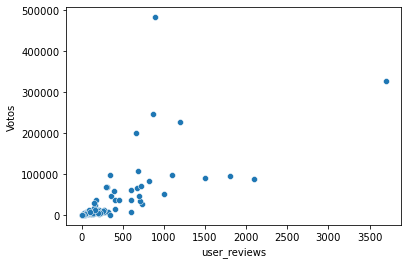

In [92]:
sns.scatterplot(data=dados, x="user_reviews", y="Votos")

<AxesSubplot:xlabel='critic_reviews', ylabel='Votos'>

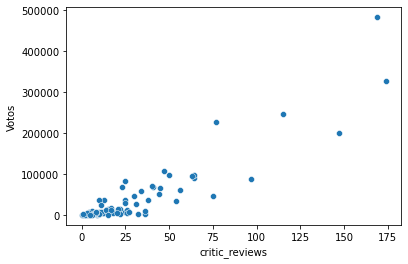

In [93]:
sns.scatterplot(data=dados, x="critic_reviews", y="Votos")

### Número e duração de episódios por engajamento

<AxesSubplot:xlabel='Episodios', ylabel='CountTotal'>

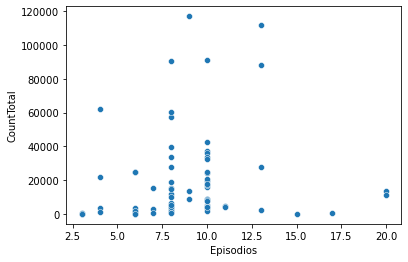

In [21]:
sns.scatterplot(data=dados, x="Episodios", y="CountTotal")

In [ ]:
dados.co

<AxesSubplot:xlabel='Duração', ylabel='CountTotal'>

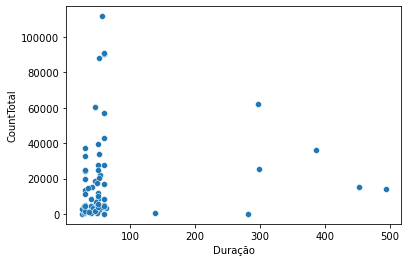

In [22]:
sns.scatterplot(data=dados, x="Duração", y="CountTotal")

In [57]:
dados[dados['Duração']>100] #corrigir, pegar a media por episodio (duracao/episodios)

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
47,Behind Her Eyes,tv mini series,9698442,7.2,51164.0,"Simona Brown, Eve Hewson, Tom Bateman, Robert ...","Drama, Mystery, Thriller",298.0,25.0,2021.0,...,English,6.0,Behind Her Eyes,2021-02-17,474.0,4177.0,20482.0,25133.0,1000,44
51,Godless,tv mini series,5516154,8.3,59209.0,"Jack O'Connell, Michelle Dockery, Scoot McNair...","Action, Drama, Western",452.0,25.0,2017.0,...,English,7.0,Godless,2017-11-22,2033.0,3078.0,10335.0,15446.0,394,34
61,Maniac,tv mini series,5580146,7.7,71686.0,"Emma Stone, Jonah Hill, Sonoya Mizuno, Justin ...","Comedy, Drama, Sci-Fi",386.0,25.0,2018.0,...,English,10.0,Maniac,2018-09-21,8295.0,9035.0,19027.0,36357.0,725,40
72,When They See Us,tv mini series,7137906,8.9,106737.0,"Asante Blackk, Caleel Harris, Ethan Herisse, M...","Biography, Crime, Drama, History",296.0,25.0,2019.0,...,English,4.0,When They See Us,2019-05-31,3204.0,19731.0,39355.0,62290.0,679,47
77,The Haunting of Bly Manor,tv mini series,10970552,7.4,87053.0,"Victoria Pedretti, Oliver Jackson-Cohen, Ameli...","Drama, Horror, Mystery, Thriller",494.0,25.0,2020.0,...,English,9.0,The Haunting of Bly Manor,2020-10-09,3459.0,4436.0,5971.0,13866.0,2100,97
82,The English Game,tv mini series,8403664,7.6,13463.0,"Edward Holcroft, Kevin Guthrie, Charlotte Hope...","Drama, History, Sport",281.0,25.0,2020.0,...,English,6.0,The English Game,2020-03-20,0.0,1.0,5.0,6.0,162,17
84,Homemade,tv series,12574336,5.9,742.0,"Kristen Stewart, Peter Sarsgaard, Cate Blanche...",Drama,138.0,10.0,2020.0,...,"English, Italian, Spanish",17.0,Homemade,2020-06-30,142.0,180.0,232.0,554.0,10,5


## Atores e engajamento

## Influência de engajamento anterior no posterior

<AxesSubplot:xlabel='CountPre', ylabel='CountDurante'>

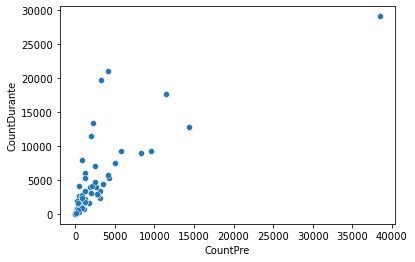

In [58]:
sns.scatterplot(data=dados, x="CountPre", y="CountDurante")

<AxesSubplot:xlabel='CountDurante', ylabel='CountPos'>

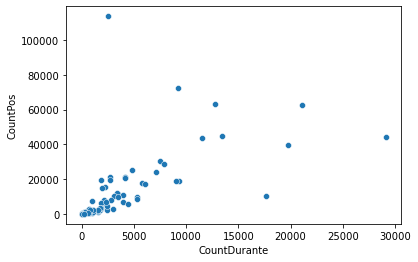

In [59]:
sns.scatterplot(data=dados[dados['Titulo']!="Stranger Things"], x="CountDurante", y="CountPos")

## Engajamento e genêro

In [60]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
dados['Gênero']

0          [Mystery, Thriller]
1            [Romance, Sci-Fi]
2     [Crime, Drama, Thriller]
3                      [Drama]
4     [Crime, Drama, Thriller]
                ...           
80    [Crime, Drama, Thriller]
81             [Comedy, Drama]
82     [Drama, History, Sport]
83                     [Drama]
84                     [Drama]
Name: Gênero, Length: 85, dtype: object

In [61]:
pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
81,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Censura e engajamento

## Reviews e engajamento